In [1]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
from wind_ae.wrapper.wrapper_utils.plots import energy_plot, six_panel_plot, quick_plot 
from wind_ae.wrapper.wrapper_utils import constants as const
from wind_ae.wrapper.wrapper_utils.system import system
from wind_ae.wrapper.wrapper_utils.spectrum import spectrum
import wind_ae.McAstro.atoms.atomic_species as McAtom

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# To read in all solutions and write their outputs to a file, run the following
# sim = wind_sim()

# Mps   = []
# Rps   = []
# Mdots = []
# eff   = []
# Rsp   = []
# RXUV  = []
# cond  = []

# path = 'data/Grid/Low_flux/'
# dir_list = os.listdir(path)
# for name in dir_list:
#     if name[-4:]=='.csv':
#         try:
#             print(name)
#             sim.load_uservars(path+name)
#             Mps = np.append(Mps,sim.windsoln.Mp)
#             Rps = np.append(Rps,sim.windsoln.Rp) 
#             Mdots = np.append(Mdots,sim.windsoln.Mdot)
#             Rsp = np.append(Rsp,sim.windsoln.R_sp)
#             launch_idx = sim.erf_velocity(return_idx=True)[-1]
#             RXUV = np.append(RXUV,sim.windsoln.soln_norm['r'][launch_idx])
#             sim.windsoln.add_user_vars()
#             bads = np.where(abs(sim.windsoln.soln['cool_cond'][launch_idx:])>sim.windsoln.soln['heat_ion'][launch_idx:])[0]
#             if len(bads)>10:
#                 cond = np.append(cond,1)
#             else:
#                 cond = np.append(cond,0)
#     #                 F = sim.windsoln.Lstar*4*np.pi*sim.windsoln.semimajor**2
#             eff = np.append(eff,sim.windsoln.calc_efficiency())
#         except FileNotFoundError:
#             continue
                
# f = open('saves/Grids/grid_9-17/Mdots.dat','w')
# f.write("Mp (Mj), Rp (Rj), Mdots (g/s), Rsp (Rp), RXUV (Rp), cond\n")
# for idx in range(len(Mdots)):
#     f.write("%.5e,%.5e,%.2e,%.2f,%.2f,%.2f,%d\n"%(Mps[idx],Rps[idx],Mdots[idx],eff[idx],Rsp[idx],RXUV[idx],cond[idx]))
# f.close()

hi_143.70Me_7.85Re.csv
hi_444.36Me_19.05Re.csv
hi_69.29Me_20.65Re.csv
hi_25.94Me_9.85Re.csv
hi_58.02Me_10.65Re.csv
hi_183.11Me_7.85Re.csv
hi_108.47Me_4.65Re.csv
hi_84.04Me_5.85Re.csv
hi_86.36Me_15.85Re.csv
hi_228.29Me_20.25Re.csv
hi_69.48Me_16.25Re.csv
hi_71.19Me_16.65Re.csv
hi_147.25Me_10.25Re.csv
hi_170.23Me_11.85Re.csv
hi_16.22Me_7.85Re.csv
hi_4.65Me_2.25Re.csv
hi_58.55Me_17.45Re.csv
hi_17.87Me_8.65Re.csv
hi_143.76Me_16.25Re.csv
hi_239.18Me_16.65Re.csv
hi_13.74Me_6.65Re.csv
hi_202.28Me_11.05Re.csv
hi_253.53Me_13.85Re.csv
hi_44.90Me_17.05Re.csv
hi_210.25Me_18.65Re.csv
hi_101.61Me_18.65Re.csv
hi_114.41Me_6.25Re.csv
hi_150.84Me_17.05Re.csv
hi_38.69Me_9.05Re.csv
hi_238.89Me_13.05Re.csv
hi_19.62Me_7.45Re.csv
hi_44.68Me_5.05Re.csv
hi_146.14Me_21.05Re.csv
hi_15.39Me_7.45Re.csv
hi_26.34Me_7.85Re.csv
hi_112.77Me_7.85Re.csv
hi_39.76Me_11.85Re.csv
hi_101.30Me_11.45Re.csv
hi_155.12Me_6.65Re.csv
hi_62.64Me_14.65Re.csv
hi_42.12Me_9.85Re.csv
hi_66.74Me_12.25Re.csv
hi_35.42Me_13.45Re.csv
hi_165.16M

hi_33.31Me_12.65Re.csv
hi_12.09Me_5.85Re.csv
hi_3.82Me_1.85Re.csv
hi_7.96Me_3.85Re.csv
hi_18.40Me_2.65Re.csv
hi_223.78Me_19.85Re.csv
hi_169.66Me_15.05Re.csv
hi_189.77Me_21.45Re.csv
hi_392.65Me_21.45Re.csv
hi_80.48Me_3.45Re.csv
hi_42.45Me_12.65Re.csv
hi_11.58Me_3.45Re.csv
hi_165.66Me_9.05Re.csv
hi_174.17Me_15.45Re.csv
hi_135.04Me_19.45Re.csv
hi_108.15Me_19.85Re.csv
hi_326.75Me_17.85Re.csv
hi_30.14Me_7.05Re.csv
hi_52.38Me_12.25Re.csv
hi_145.79Me_6.25Re.csv
hi_29.87Me_2.65Re.csv
hi_20.98Me_3.85Re.csv
hi_164.99Me_18.65Re.csv
hi_172.99Me_9.45Re.csv
hi_192.44Me_8.25Re.csv
hi_16.62Me_3.05Re.csv
hi_91.71Me_21.45Re.csv
hi_51.84Me_15.45Re.csv
hi_77.80Me_4.25Re.csv
hi_180.31Me_9.85Re.csv
hi_44.95Me_8.25Re.csv
hi_136.46Me_5.85Re.csv
hi_158.74Me_11.05Re.csv
hi_53.18Me_15.85Re.csv
hi_73.94Me_10.65Re.csv
hi_11.19Me_4.25Re.csv
hi_129.48Me_18.65Re.csv
hi_154.38Me_17.45Re.csv
hi_120.06Me_10.65Re.csv
hi_193.30Me_21.85Re.csv
hi_43.83Me_10.25Re.csv
hi_59.22Me_13.85Re.csv
hi_87.83Me_12.65Re.csv
hi_48.22Me_5

In [21]:
sim = wind_sim()
sim.load_planet('data/Grid/Low_flux/10.08Me_1.85Re.csv')

def Mdot_elim(Mp,Rp,FXUV,eff):
    r_hill = 0.05*const.au*(Mp/(3.*sim.windsoln.Mstar))**(1./3.)
    epsilon = r_hill/Rp #in units of Rp, so already /Rp
    correction = (1 - 3/(2*epsilon) - 1/(2*epsilon**3))**(-1)
    return eff*FXUV*np.pi*Rp**3/(const.G*Mp)*correction

from collections import Counter
def interp_2D(file,to_plot,FEUV=1095):
    try:
        Mps,Rps,Mdots,Rsp,Rxuv,Rhill,cond,effs = np.load(file)
    except ValueError:
        Mps,Rps,Mdots,Rsp,Rxuv,cond,effs = np.load(file)
        Rhill = np.zeros_like(Mps)
        
    Mps=Mps[1:,:]
    Rps=Rps[1:,:]
    Rsp=Rsp[1:,:]
    Rxuv=Rxuv[1:,:]
    Mdots=Mdots[1:,:]
    effs=effs[1:,:]
    cond=cond[1:,:]
    Rhill=Rhill[1:,:]
    words = np.where(cond==1)[0]
    xlims = []
    start = 0
    for v,k in zip(Counter(words).values(),Counter(words).keys()):
        delta = Mps[k] - (Mps[k]-Mps[k-1])/2
        xlims = np.append(xlims,delta[start:start+v])
        start += v

    Mps = np.ravel(Mps[np.isnan(Mps)==False])
    Rps = np.ravel(Rps[np.isnan(Rps)==False])
    Rsp = np.ravel(Rsp[np.isnan(Rsp)==False])
    effs = np.ravel(effs[np.isnan(effs)==False])
    Mdots=np.ravel(Mdots[np.isnan(Mdots)==False])
    RXUV = np.ravel(Rxuv[np.isnan(Rxuv)==False])*Rps
    Rhill = np.ravel(Rhill[np.isnan(Rhill)==False])
    cond = np.ravel(cond[np.isnan(cond)==False])
    # pressure = np.ravel(pressure[np.isnan(pressure)==False])

    
    from scipy.interpolate import griddata
    grid_x, grid_y = np.mgrid[0:1:1000j, 0:1:1000j]
    rng = np.random.default_rng()
    points = np.zeros((len(Mps), 2))
    points[:,0] = Mps/max(Mps)
    points[:,1] = Rps/max(Rps)

    if to_plot=='fracdiff':
        values = (Mdots-Mdot_elim(Mps,Rps,FEUV,effs))/Mdot_elim(Mps,Rps,FEUV,effs)
    elif to_plot=='ratio':
        values = np.log10(Mdots/Mdot_elim(Mps,Rps,FEUV,effs))
    elif to_plot=='rxuv':
        values = (Mdots-Mdot_elim(Mps,RXUV,FEUV,effs))/Mdot_elim(Mps,RXUV,FEUV,effs)
    elif to_plot=='radius_diff':
        values = RXUV-Rps
    elif to_plot=='rsp_diff':
        values = np.log10(Rsp-1)
    elif to_plot=='mdots':
        values = np.log10(Mdots)
    elif to_plot=='effs':
        values = effs
    elif to_plot=='rhill':
        values = Rhill - Rsp*Rps
    # elif to_plot=='pressure':
    #     values = effs
    elif to_plot=='frac_const_eff':
        values = (Mdots-Mdot_elim(Mps,Rps,FEUV,0.15*np.ones_like(Mps)))/Mdot_elim(Mps,Rps,FEUV,0.15*np.ones_like(Mps))
        
    # grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
    grid_z = griddata(points, values, (grid_x, grid_y), method='linear')

    return grid_x*max(Mps),grid_y*max(Rps),grid_z,np.array(xlims)

mscale = const.Mjupiter
rscale = const.Rjupiter

import matplotlib.colors as mcolors

def truncate_colormap(cmap = plt.get_cmap("bwr"), minval=-1.0, maxval=5.0, orig_min=-5.0, orig_max=5.0):
    n=cmap.N
    norm = orig_max-orig_min
    mincolor = minval/norm - orig_min/norm
    maxcolor = maxval/norm - orig_min/norm
    print(mincolor, maxcolor)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(mincolor, maxcolor, n)))
    return new_cmap

bwr_t = truncate_colormap()


Mps,Rps,Mdots,Rsp,Rxuv,Rhill,cond,effs = np.load('data/Grid/Low_flux/2D_Mdots_rhill.npy')
Mps=Mps[1:,:]
Rps=Rps[1:,:]
Rsp=Rsp[1:,:]
Rhill=Rhill[1:,:]
mask = np.where((Rhill - Rsp*Rps)<0)
# plt.plot(Mps[mask][:-1]/mscale,Rps[mask][:-1]/rscale,c='grey',marker='x')
hash_Rps = Rps[mask][:-1]/rscale
hash_Mps = Mps[mask][:-1]/mscale
hash_Rps = np.append(0.2,hash_Rps)
hash_Mps = np.append(0.015,hash_Mps)
hash_Rps = np.append(hash_Rps,2)
hash_Mps = np.append(hash_Mps,0.25)
hash_Mps[:8]*=1.1
hash_Mps[8:17]*=1.08
hash_Mps[17:]*=1.02

Mps,Rps,Mdots,Rsp,Rxuv,Rhill,cond,effs = np.load('data/Grid/High_flux/2D_Mdots_rhill.npy')
Mps=Mps[1:,:]
Rps=Rps[1:,:]
Rsp=Rsp[1:,:]
Rhill=Rhill[1:,:]
mask = np.where((Rhill - Rsp*Rps)<0)
# plt.plot(Mps[mask][:-1]/mscale,Rps[mask][:-1]/rscale,c='grey',marker='x')
hash_Rps_hi = Rps[mask][:-1]/rscale
hash_Mps_hi = Mps[mask][:-1]/mscale
hash_Rps_hi = np.append(0.2,hash_Rps_hi)
hash_Mps_hi = np.append(0.014,hash_Mps_hi)
hash_Rps_hi = np.append(hash_Rps_hi,2)
hash_Mps_hi = np.append(hash_Mps_hi,0.25)
hash_Mps_hi[:10]*=1.1
hash_Mps_hi[10:22]*=1.08
hash_Mps_hi[22:]*=1.03

Atmosphere Composition
  Species:   HI,        HeI
  Mass frac: 8.00e-01, 2.00e-01

0.4 1.0


# Lower Flux
$F_{XUV}=1095$ ergs $s^{-1}$ $cm^{-2}$

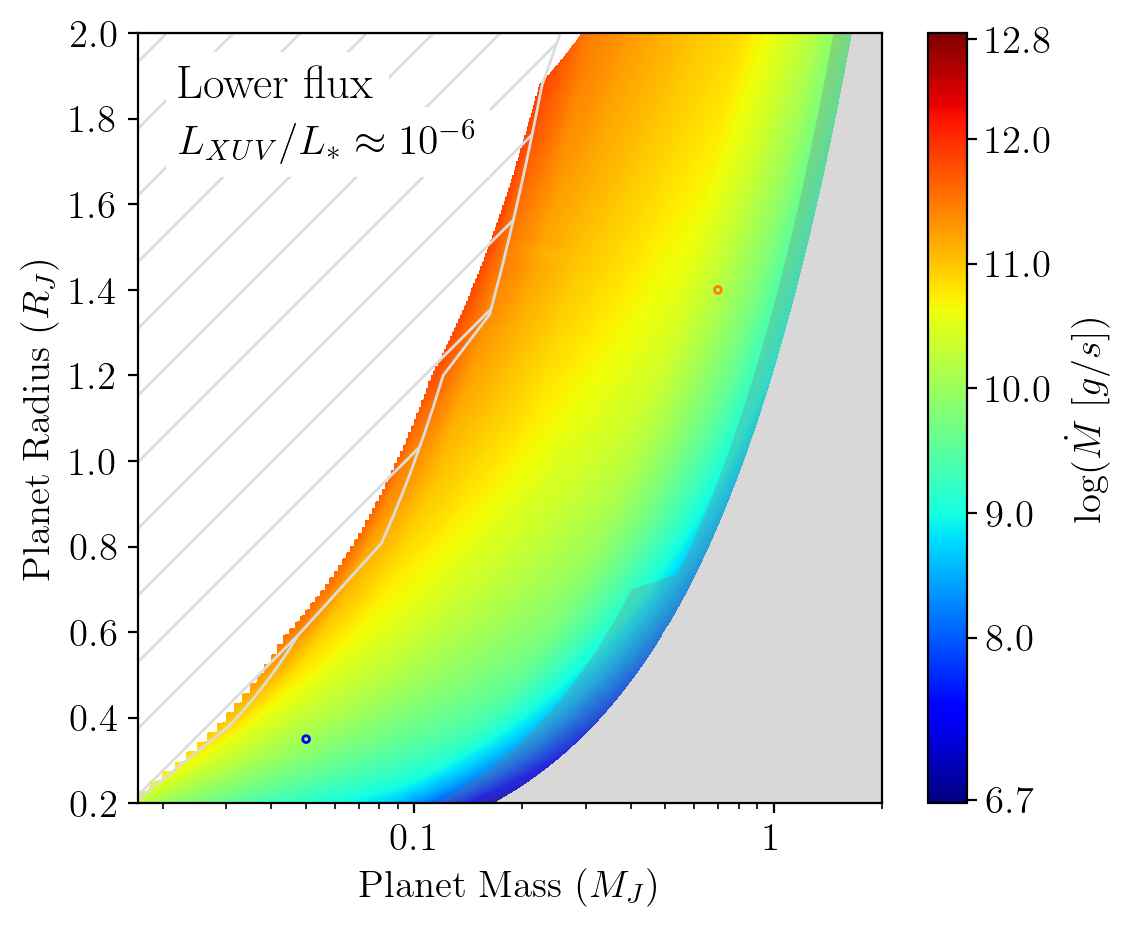

In [18]:
#Mdots
plt.figure(figsize=(6,5))
x,y,z,cond_lim = interp_2D('data/Grid/Low_flux/2D_Mdots_fixed.npy','mdots')
lim=5
mscale = const.Mjupiter
rscale = const.Rjupiter
plt.contourf(x/mscale,y/rscale,z,cmap='jet',levels=np.linspace(6.67,12.85,1000)) #,levels=1000,vmin=-10,vmax=10)
colorbar = plt.colorbar(label=r'log($\dot{M}$ [$g/s$])')
# colorbar = plt.colorbar(label=r'($\dot{M}$-$\dot{M}_{Elim}$)/$\dot{M}_{Elim}$')
colorbar.set_ticks([6.7,8,9,10,11,12,12.8])
#cut off colorbar at -1 (otherwise unphysical)


plt.text(0.022,1.85,r'Lower flux',fontsize=17,backgroundcolor='white')
plt.text(0.022,1.72,r'$L_{XUV}/L_{*}\approx10^{-6}$',fontsize=15,backgroundcolor='white')
plt.xscale('log')
plt.xticks([0.1,1],['0.1','1'])
plt.xlim(0.017,2)
plt.ylim(0.2,2.)
plt.xlabel(r'Planet Mass ($M_J$)')
plt.ylabel(r'Planet Radius ($R_J$)')
plt.scatter(0.7,1.4,facecolors='none',edgecolor='tab:orange',s=6)
plt.scatter(0.05,0.35,facecolors='none',edgecolor='blue',s=6)
Mplanet = x[:,10]

radius_array = np.load('data/Grid/Low_flux/radius_array.npy')*const.Rearth
plt.fill_betweenx(hash_Rps,0,hash_Mps,edgecolor='gainsboro',hatch='/',facecolor='none')
plt.fill_betweenx(radius_array/rscale,cond_lim/mscale,10,alpha=0.3,color='grey',edgecolor=None)

plt.show()

### Energy-limited mass loss evaluated at $R_P$

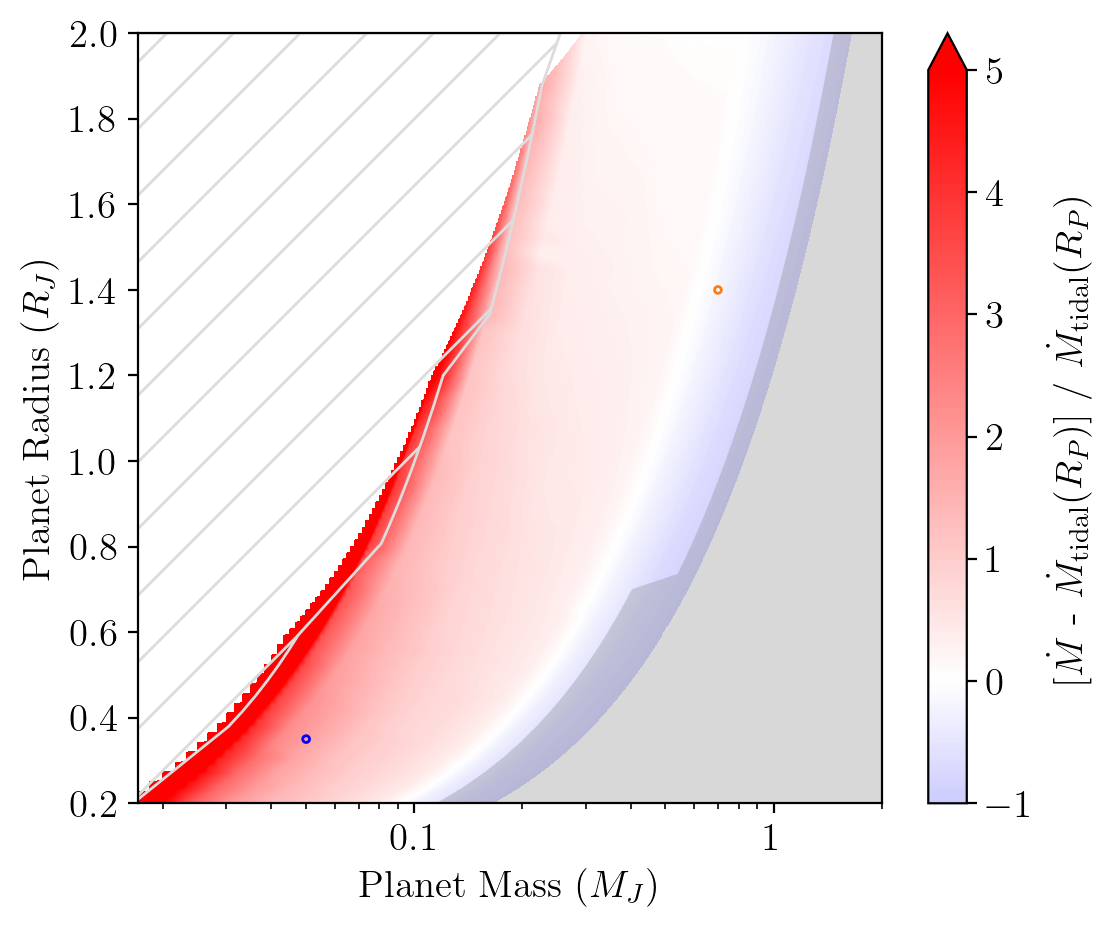

In [19]:
#fractional difference
plt.figure(figsize=(6,5))
x,y,z,cond_lim = interp_2D('data/Grid/Low_flux/2D_Mdots_fixed.npy','fracdiff')
lim=5
plt.contourf(x/mscale,y/rscale,z,
             cmap=bwr_t, extend="max", levels=np.linspace(-1,5,1000), vmin=-1, vmax=5)#cmap='bwr',extend='both', 
plt.colorbar(cmap=bwr_t, ticks=[-1,0,1,2,3,4,5], label=r'[$\dot{M}$ - $\dot{M}_{\rm{tidal}}(R_P)$] / $\dot{M}_{\rm{tidal}}(R_P)$')

plt.xscale('log')
plt.xticks([0.1,1],['0.1','1'])
plt.xlim(0.017,2)
plt.ylim(0.2,2.)
plt.xlabel(r'Planet Mass ($M_J$)')
plt.ylabel(r'Planet Radius ($R_J$)')
plt.scatter(0.7,1.4,facecolors='none',edgecolor='tab:orange',s=6)
plt.scatter(0.05,0.35,facecolors='none',edgecolor='blue',s=6)

radius_array = np.load('data/Grid/Low_flux/radius_array.npy')*const.Rearth
plt.fill_betweenx(radius_array/rscale,cond_lim/mscale,10,alpha=0.3,color='grey',edgecolor=None)
Mplanet = x[:,10]

plt.fill_betweenx(hash_Rps,0,hash_Mps,edgecolor='gainsboro',hatch='/',facecolor='none')
plt.show()

### Energy-limited mass loss rate evalueated at $R_{XUV}$

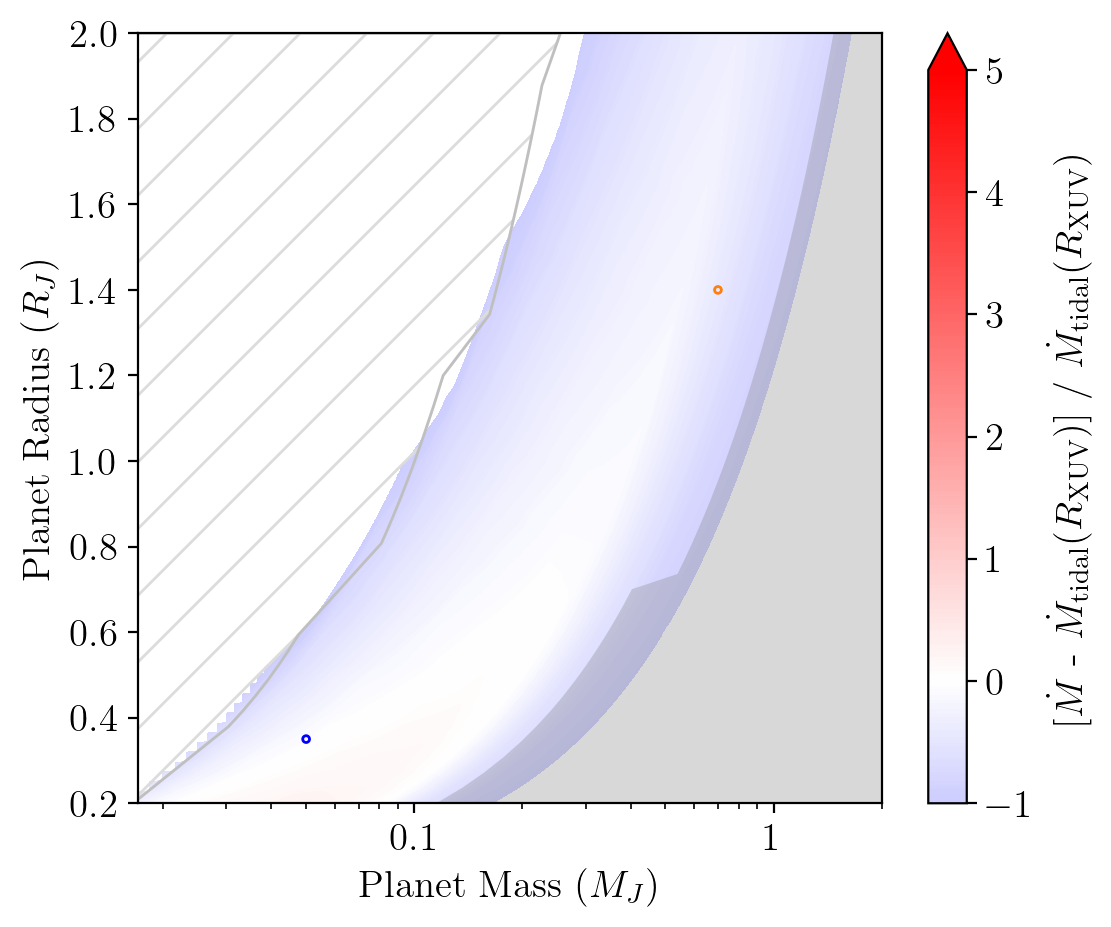

In [ ]:
#Rxuv
plt.figure(figsize=(6,5))
x,y,z,xlims = interp_2D('data/Grid/Low_flux/2D_Mdots_fixed.npy','rxuv')
lim=5
plt.contourf(x/mscale,y/rscale,z,
             cmap=bwr_t, extend="max", levels=np.linspace(-1,5,1000), vmin=-1, vmax=5)
plt.colorbar(cmap=bwr_t, ticks=[-1,0,1,2,3,4,5], label=r'[$\dot{M}$ - $\dot{M}_{\rm{tidal}}(R_{\rm{XUV}})$] / $\dot{M}_{\rm{tidal}}(R_{\rm{XUV}})$')

plt.xscale('log')
plt.xticks([0.1,1],['0.1','1'])
plt.xlim(0.017,2)
plt.ylim(0.2,2.)
plt.xlabel(r'Planet Mass ($M_J$)')
plt.ylabel(r'Planet Radius ($R_J$)')
plt.scatter(0.7,1.4,facecolors='none',edgecolor='tab:orange',s=6)
plt.scatter(0.05,0.35,facecolors='none',edgecolor='blue',s=6)

radius_array = np.load('data/Grid/Low_flux/radius_array.npy')*const.Rearth
plt.fill_betweenx(radius_array/rscale,xlims/mscale,10,alpha=0.3,color='grey',edgecolor=None)
plt.fill_betweenx(hash_Rps,0,hash_Mps,edgecolor='gainsboro',hatch='/',facecolor='none')
plt.fill_betweenx(hash_Rps,0,hash_Mps,edgecolor='tab:grey',alpha=0.3,facecolor='none')
plt.show()

### Ratio of $\dot{M}$ to energy-limited mass loss rate

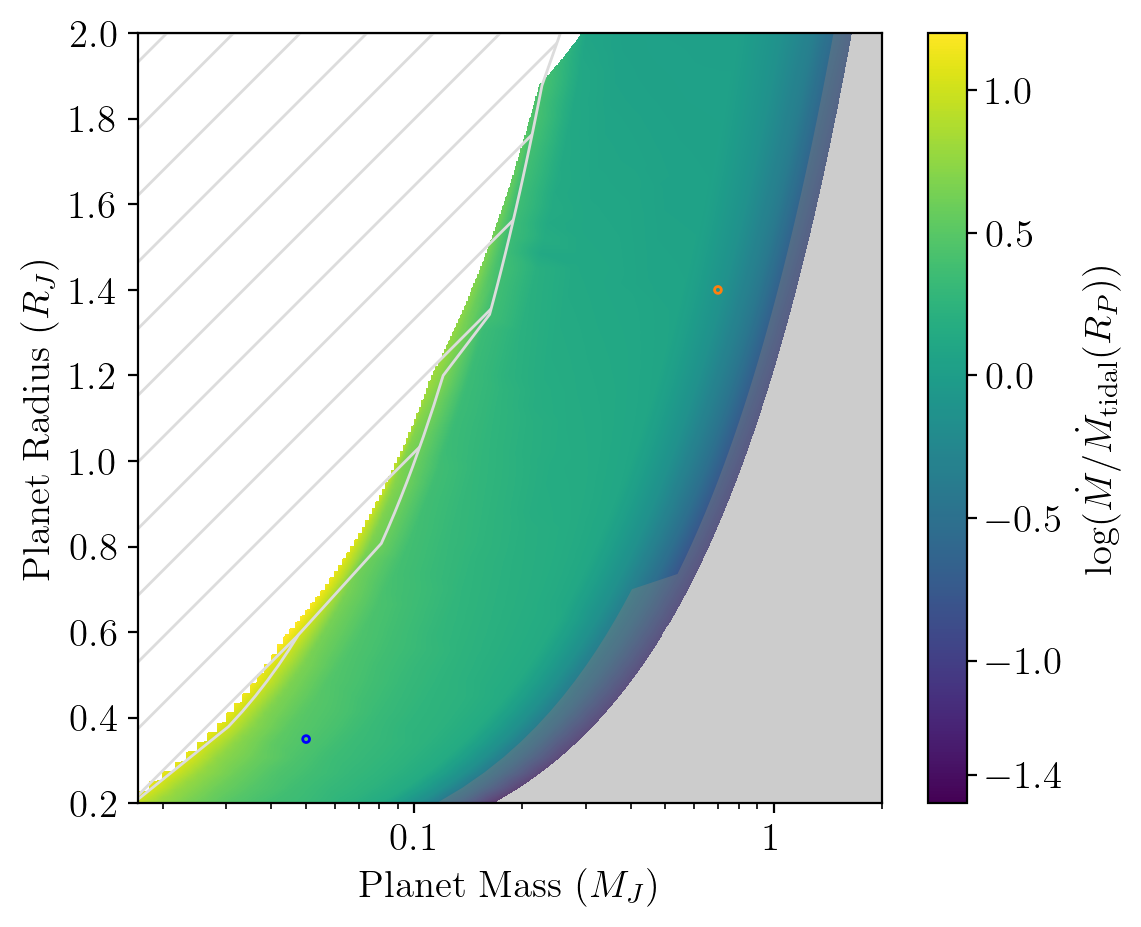

In [20]:
#ratio
plt.figure(figsize=(6,5))

x,y,z,xlims = interp_2D('data/Grid/Low_flux/2D_Mdots_fixed.npy','ratio')
lim=5
plt.contourf(x/mscale,y/rscale,z,cmap='viridis',levels=np.linspace(-1.5,1.2,1000)) #,levels=1000,vmin=-10,vmax=10)
colorbar = plt.colorbar(label=r'log$(\dot{M}/\dot{M}_{\rm{tidal}}(R_P))$')
# colorbar = plt.colorbar(label=r'($\dot{M}$-$\dot{M}_{Elim}$)/$\dot{M}_{Elim}$')
colorbar.set_ticks([-1.4,-1,-0.5,0,0.5,1])

plt.xscale('log')
plt.xticks([0.1,1],['0.1','1'])
plt.xlim(0.017,2)
plt.ylim(0.2,2.)
plt.xlabel(r'Planet Mass ($M_J$)')
plt.ylabel(r'Planet Radius ($R_J$)')
plt.scatter(0.7,1.4,facecolors='none',edgecolor='tab:orange',s=6)
plt.scatter(0.05,0.35,facecolors='none',edgecolor='blue',s=6)

radius_array = np.load('data/Grid/Low_flux/radius_array.npy')*const.Rearth
plt.fill_betweenx(radius_array/rscale,xlims/mscale,10,alpha=0.4,color='grey',edgecolor=None)
plt.fill_betweenx(hash_Rps,0,hash_Mps,edgecolor='gainsboro',hatch='/',facecolor='none')

plt.show()

# High flux
Don't need to gray out the region where conductive cooling is relevant because it is not relevant a high fluxes.

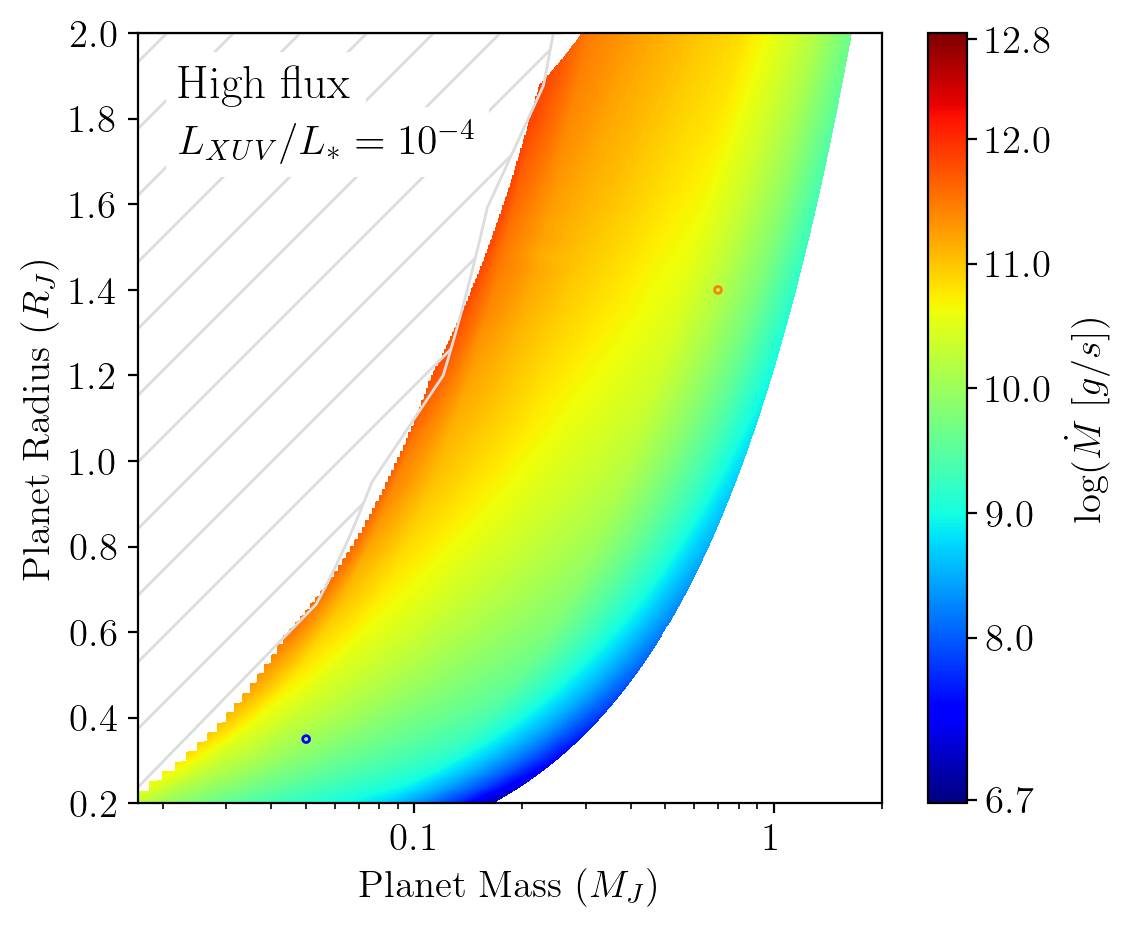

In [22]:
#Mdots
plt.figure(figsize=(6,5))
x,y,z,cond_lim = interp_2D('data/Grid/Low_flux/2D_Mdots.npy','mdots')
lim=5
mscale = const.Mjupiter
rscale = const.Rjupiter
plt.contourf(x/mscale,y/rscale,z,cmap='jet',levels=np.linspace(6.67,12.85,1000)) #,levels=1000,vmin=-10,vmax=10)
colorbar = plt.colorbar(label=r'log($\dot{M}$ [$g/s$])')
colorbar.set_ticks([6.7,8,9,10,11,12,12.8])

plt.xscale('log')
plt.xticks([0.1,1],['0.1','1'])
plt.xlim(0.017,2)
plt.ylim(0.2,2.)
plt.xlabel(r'Planet Mass ($M_J$)')
plt.ylabel(r'Planet Radius ($R_J$)')
plt.scatter(0.7,1.4,facecolors='none',edgecolor='tab:orange',s=6)
plt.scatter(0.05,0.35,facecolors='none',edgecolor='blue',s=6)

plt.text(0.022,1.85,r'High flux',fontsize=17,backgroundcolor='white')
plt.text(0.022,1.72,r'$L_{XUV}/L_{*}=10^{-4}$',fontsize=15,backgroundcolor='white')

plt.fill_betweenx(hash_Rps_hi,0,hash_Mps_hi,edgecolor='gainsboro',hatch='/',facecolor='none')
plt.show()

### Comparison to energy-limited mass loss rate evaluated at $R_P$

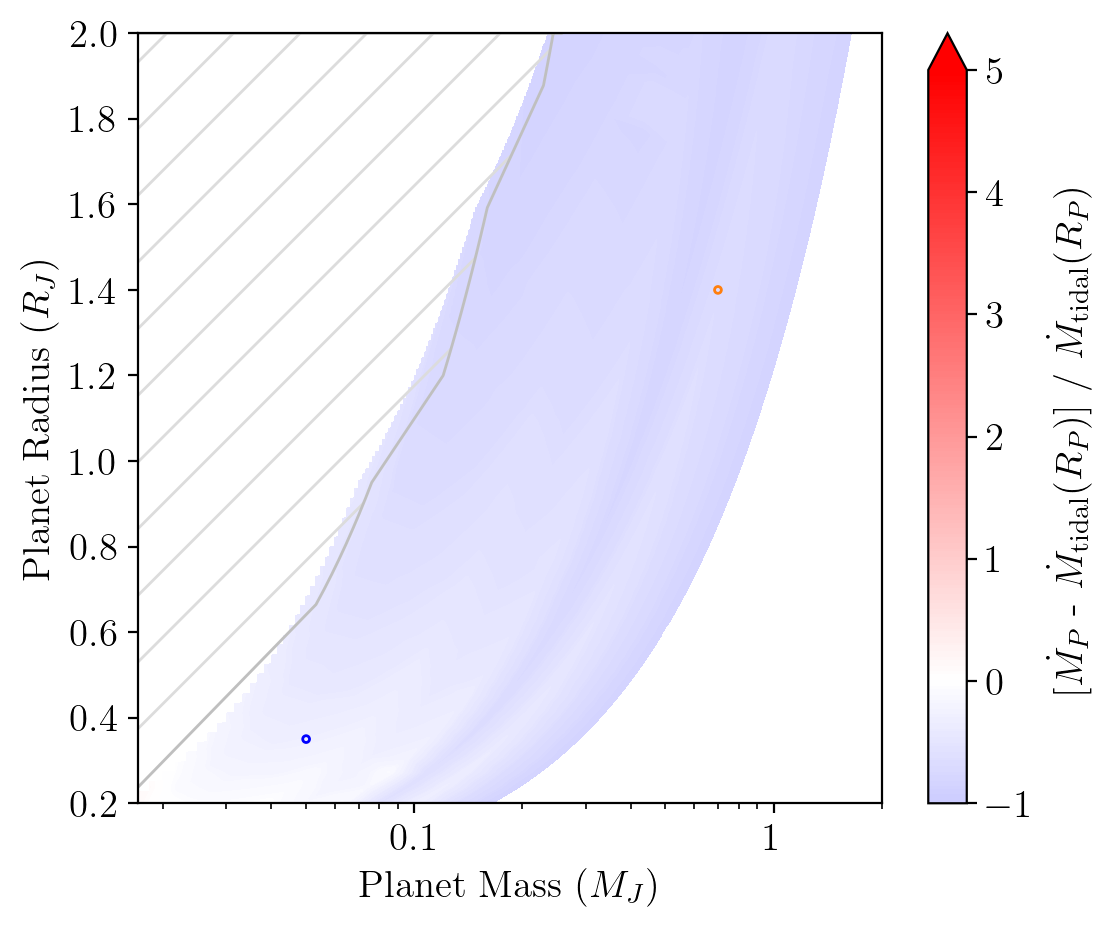

In [ ]:
#high
plt.figure(figsize=(6,5))
x,y,z,xlims = interp_2D('data/Grid/High_flux/2D_Mdots.npy','fracdiff',109500)
lim=5
plt.contourf(x/mscale,y/rscale,z,
             cmap=bwr_t, extend="max", levels=np.linspace(-1,5,1000), vmin=-1, vmax=5)

plt.colorbar(cmap=bwr_t, ticks=[-1,0,1,2,3,4,5], 
             label=r'[$\dot{M_P}$ - $\dot{M}_{\rm{tidal}}(R_P)$] / $\dot{M}_{\rm{tidal}}(R_P)$')

plt.xscale('log')
plt.xticks([0.1,1],['0.1','1'])
plt.xlim(0.017,2)
plt.ylim(0.2,2.)
plt.xlabel(r'Planet Mass ($M_J$)')
plt.ylabel(r'Planet Radius ($R_J$)')
plt.scatter(0.7,1.4,facecolors='none',edgecolor='tab:orange',s=6)
plt.scatter(0.05,0.35,facecolors='none',edgecolor='blue',s=6)
plt.fill_betweenx(hash_Rps_hi,0,hash_Mps_hi,edgecolor='gainsboro',hatch='/',facecolor='none')
plt.fill_betweenx(hash_Rps_hi,0,hash_Mps_hi,edgecolor='tab:grey',alpha=0.3,facecolor='none')

plt.show()

### Comparison to energy-limited mass loss rate at $R_{XUV}$

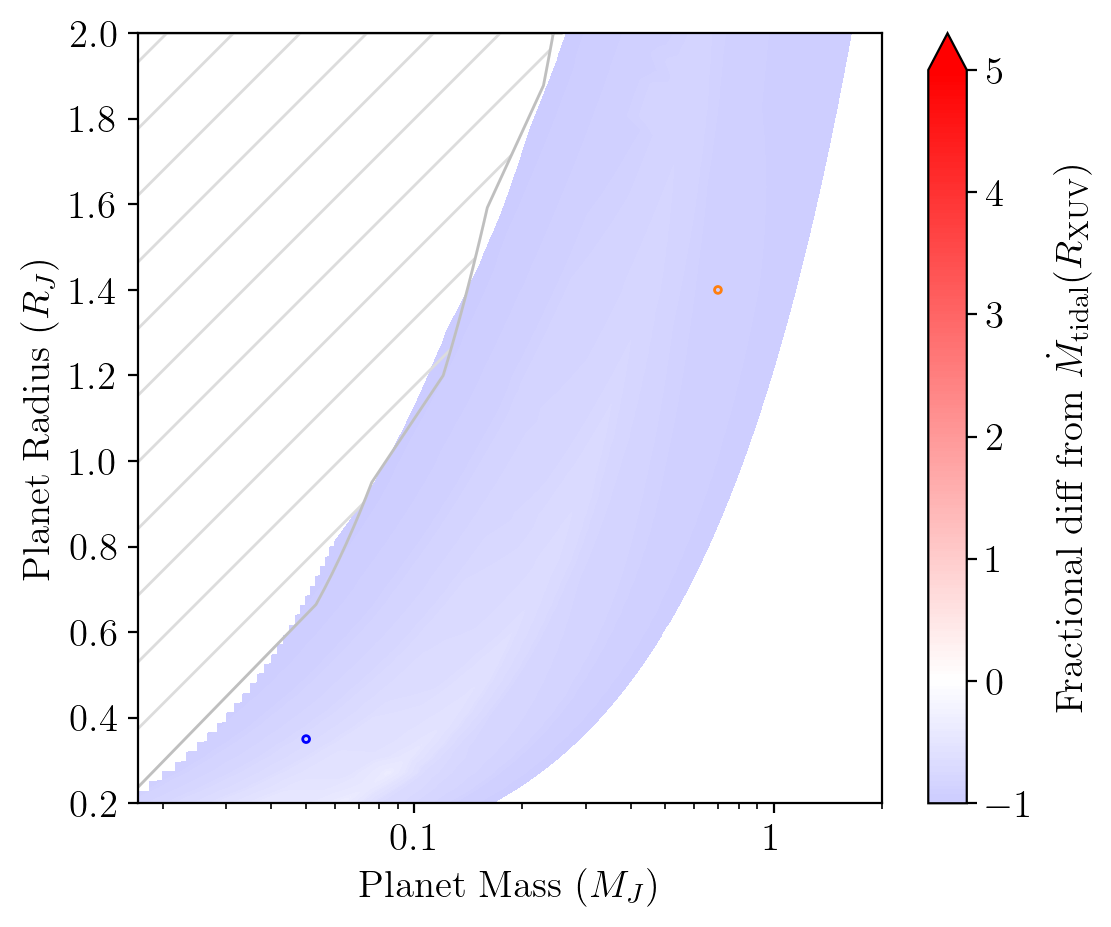

In [23]:
#high - rxuv
plt.figure(figsize=(6,5))
x,y,z,xlims = interp_2D('data/Grid/High_flux/2D_Mdots.npy','rxuv',109500)
lim=5
plt.contourf(x/mscale,y/rscale,z,
             cmap=bwr_t, extend="max", levels=np.linspace(-1,5,1000), vmin=-1, vmax=5)
#              cmap='bwr',extend='both',
#              levels=np.linspace(-lim,lim,1000)) #,levels=1000,vmin=-10,vmax=10)
plt.colorbar(cmap=bwr_t, ticks=[-1,0,1,2,3,4,5], 
             label=r'Fractional diff from $\dot{M}_{\rm{tidal}}(R_{\rm{XUV}})$')

plt.xscale('log')
plt.xticks([0.1,1],['0.1','1'])
plt.xlim(0.017,2)
plt.ylim(0.2,2.)
plt.xlabel(r'Planet Mass ($M_J$)')
plt.ylabel(r'Planet Radius ($R_J$)')
plt.scatter(0.7,1.4,facecolors='none',edgecolor='tab:orange',s=6)
plt.scatter(0.05,0.35,facecolors='none',edgecolor='blue',s=6)
plt.fill_betweenx(hash_Rps_hi,0,hash_Mps_hi,edgecolor='gainsboro',hatch='/',facecolor='none')
plt.fill_betweenx(hash_Rps_hi,0,hash_Mps_hi,edgecolor='tab:grey',alpha=0.3,facecolor='none')

plt.show()

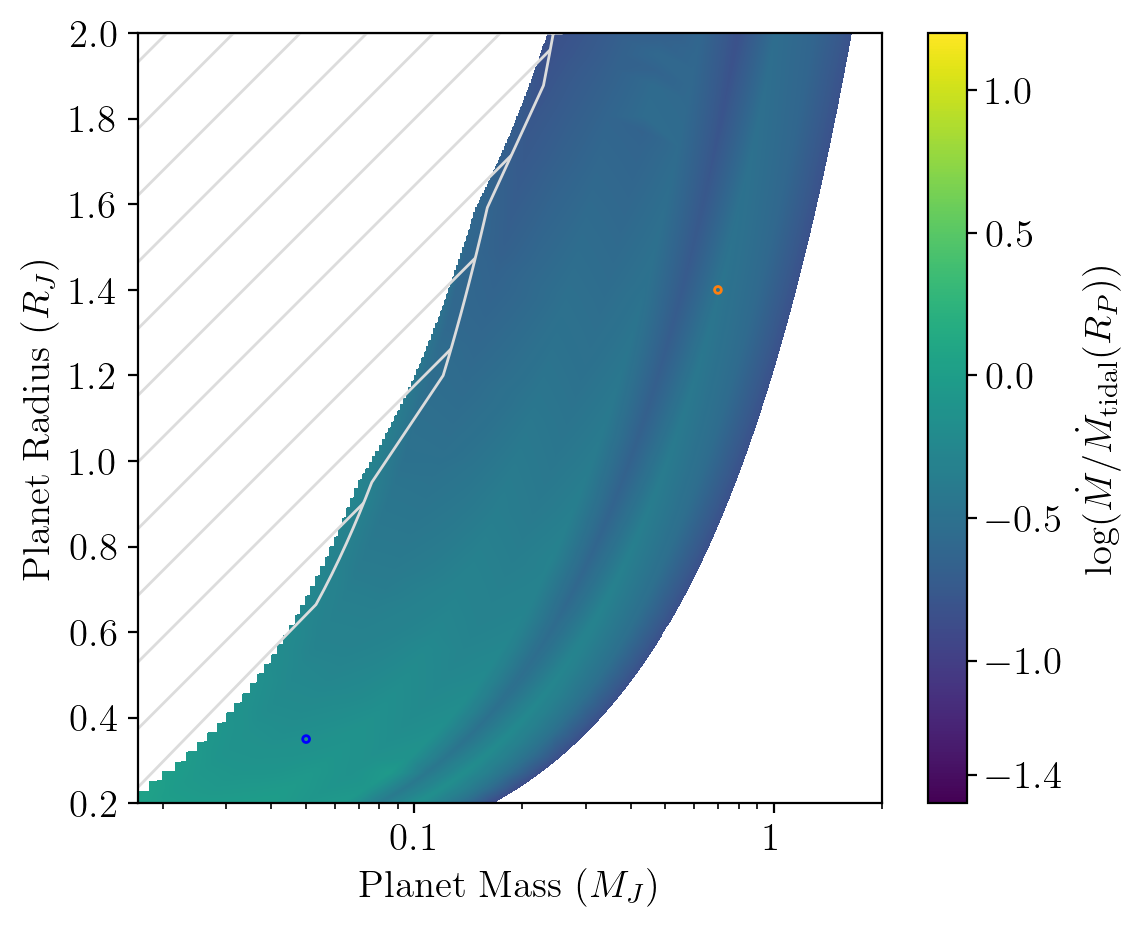

In [25]:
#ratio
plt.figure(figsize=(6,5))
# sim=wind_sim()
# sim.load_planet('saves/Grids/grid_9-17/hi_10.44Me_5.05Re.csv')
x,y,z,xlims = interp_2D('data/Grid/High_flux/2D_Mdots.npy','ratio',FEUV=109500)
lim=5
plt.contourf(x/mscale,y/rscale,z,cmap='viridis',levels=np.linspace(-1.5,1.2,1000))#,levels=np.linspace(-1.5,1.2,1000)) #,levels=1000,vmin=-10,vmax=10)
colorbar = plt.colorbar(label=r'log$(\dot{M}/\dot{M}_{\rm{tidal}}(R_P))$')
# colorbar = plt.colorbar(label=r'($\dot{M}$-$\dot{M}_{Elim}$)/$\dot{M}_{Elim}$')
colorbar.set_ticks([-1.4,-1,-0.5,0,0.5,1])

plt.xscale('log')
plt.xticks([0.1,1],['0.1','1'])
plt.xlim(0.017,2)
plt.ylim(0.2,2.)
plt.xlabel(r'Planet Mass ($M_J$)')
plt.ylabel(r'Planet Radius ($R_J$)')
plt.scatter(0.7,1.4,facecolors='none',edgecolor='tab:orange',s=6)
plt.scatter(0.05,0.35,facecolors='none',edgecolor='blue',s=6)
plt.fill_betweenx(hash_Rps_hi,0,hash_Mps_hi,edgecolor='gainsboro',hatch='/',facecolor='none')

plt.show()